In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

## Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno # missing values visualization

## Stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import norm

## Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

## Classes Imbalance
from imblearn.over_sampling import SMOTE

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


## Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Time
import time

In [4]:
df=pd.read_csv('/content/drive/MyDrive/acquiredDataset.csv')

In [5]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [6]:
df.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

In [7]:
df.shape

(3735, 11)

In [8]:
cols_to_plot = df.columns.drop('classification').to_list()
cols_to_plot

['attention',
 'meditation',
 'delta',
 'theta',
 'lowAlpha',
 'highAlpha',
 'lowBeta',
 'highBeta',
 'lowGamma',
 'highGamma']

<ipython-input-9-ef06458474ed>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-9-ef06458474ed>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-9-ef06458474ed>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

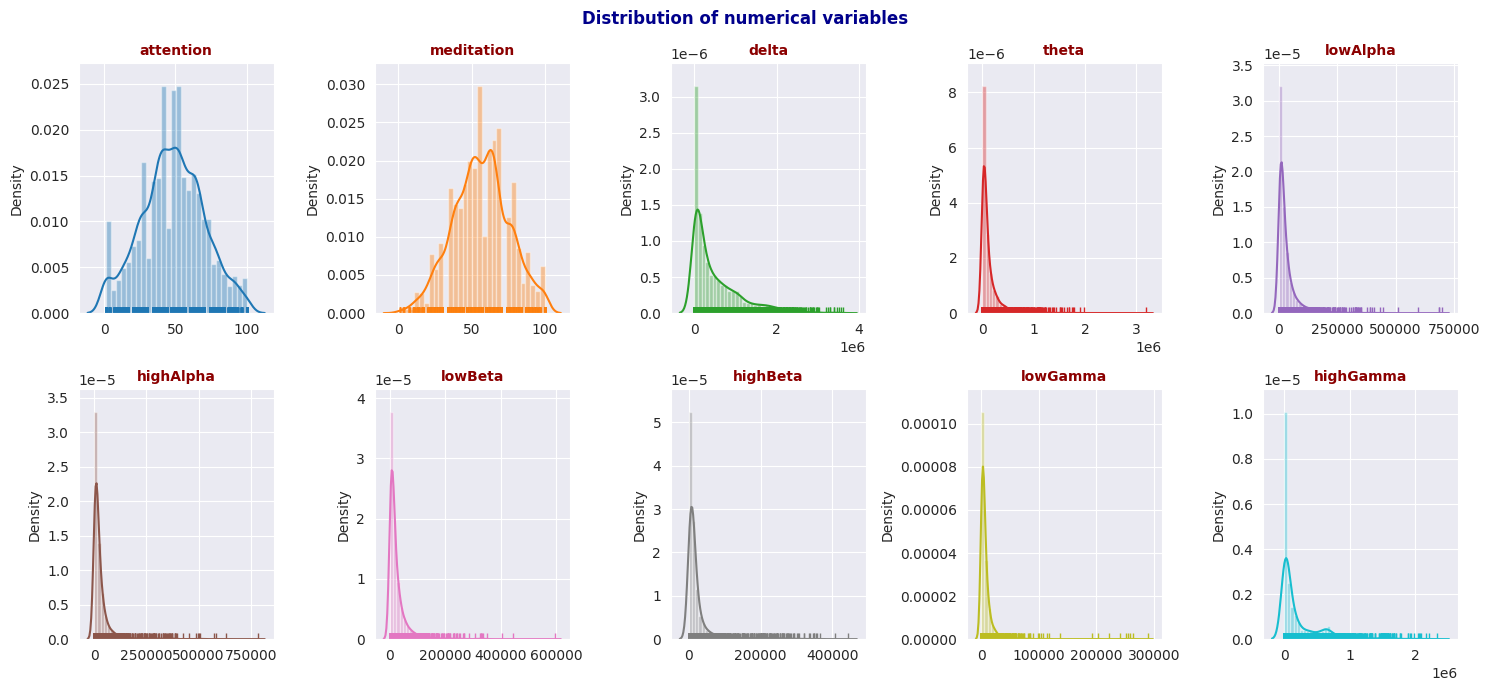

In [9]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15,7))
ax = ax.flat

for i,col in enumerate(cols_to_plot):

    sns.distplot(df[col],
                 rug = True,
                 color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax = ax[i])

    ax[i].set_xlabel('')
    ax[i].set_title(f'{col}', fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()

<ipython-input-10-3173d1378ae2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-10-3173d1378ae2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
<ipython-input-10-3173d1378ae2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

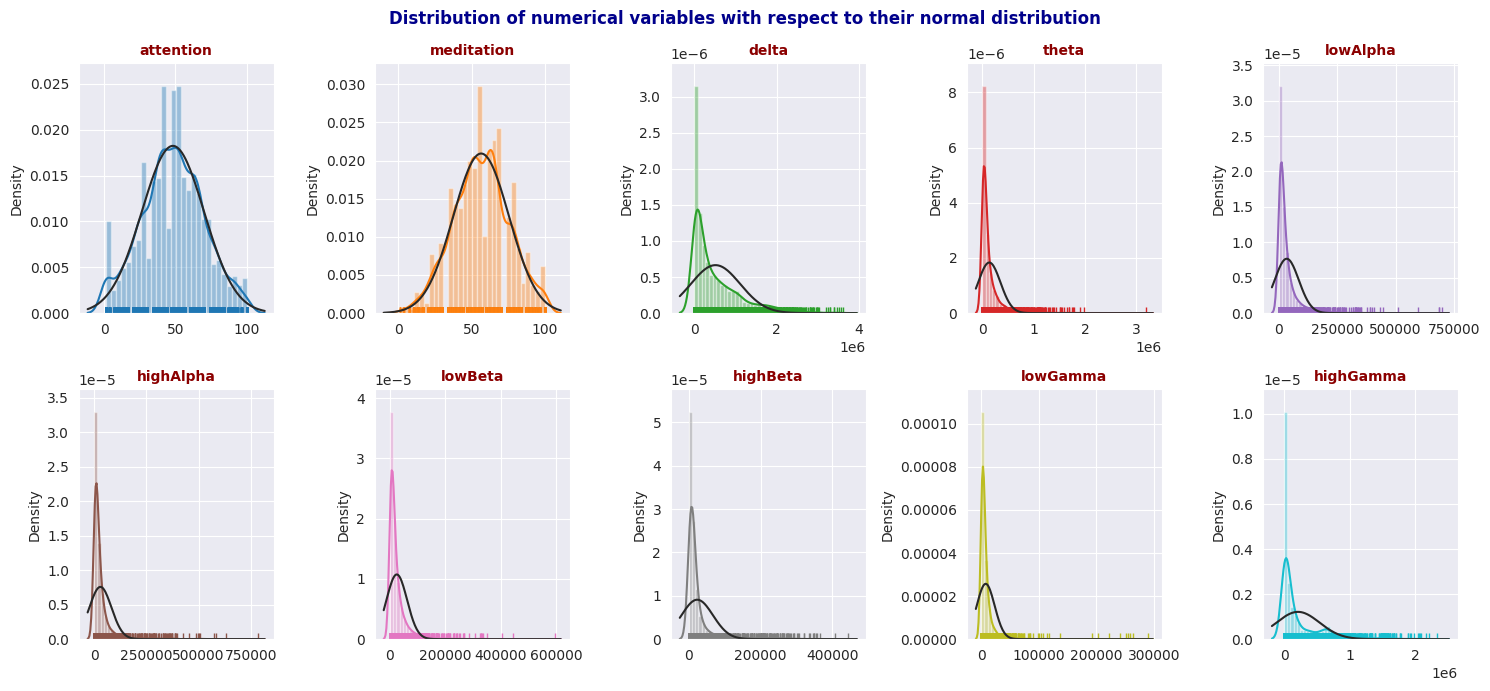

In [10]:
fig,ax = plt.subplots(nrows = 2, ncols = 5, figsize = (15,7))
ax = ax.flat

for i,col in enumerate(cols_to_plot):

    sns.distplot(df[col],
                 rug = True,
                 fit = norm,
                 color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 ax = ax[i])

    ax[i].set_xlabel('')
    ax[i].set_title(f'{col}', fontsize = 10, fontweight = 'bold', color = 'darkred')

fig.suptitle('Distribution of numerical variables with respect to their normal distribution', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()

In [11]:
def correlation(dataset , threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

4

In [13]:
corr_features

{'highAlpha', 'highBeta', 'highGamma', 'lowBeta'}

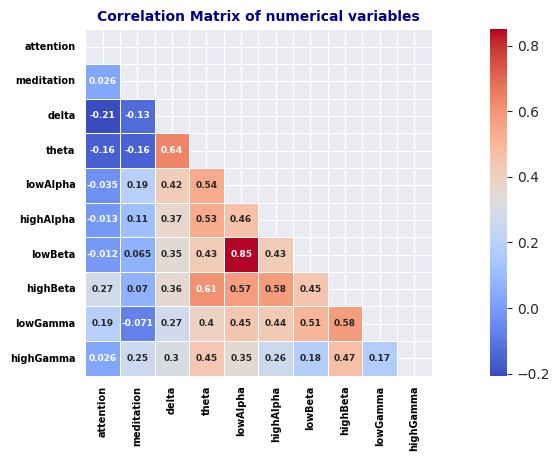

In [14]:
corr_matrix = df[cols_to_plot].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (15,4.5))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'coolwarm',
            annot_kws = {'fontsize':6.5, 'fontweight':'bold'},
            linewidths = 0.7,
            linecolor = 'white',
            square = True,
            mask = mask,
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 7, fontweight = 'bold', color = 'black')
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 7, fontweight = 'bold', color = 'black')
ax.set_title('Correlation Matrix of numerical variables', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()

In [15]:
X = df.drop(['classification'], axis = 1)
y = df['classification']

In [16]:
SEED = 42
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.3,
                                       random_state = SEED,
                                       shuffle = True,
                                       stratify = y)

print(f'Training data size: {X_train.shape}')
print(f'Testing data size: {X_test.shape}')

Training data size: (2614, 10)
Testing data size: (1121, 10)


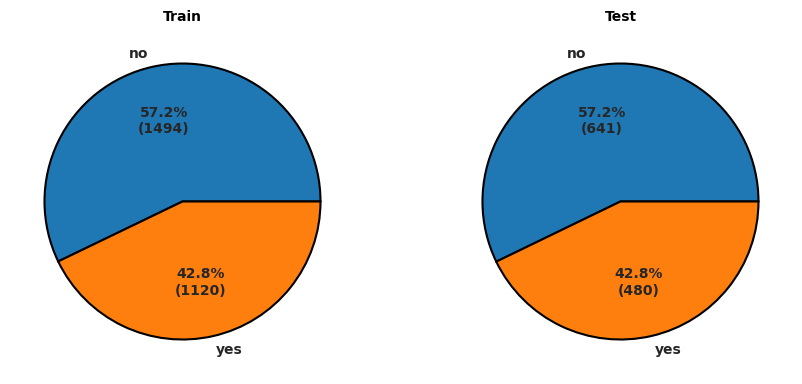

In [17]:
df_pct_train = y_train.value_counts().to_frame().rename(index = {0:'no', 1:'yes'})
df_pct_train = df_pct_train.rename(columns = {'y':'count'})

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train.iloc[:,0]

df_pct_test = y_test.value_counts().to_frame().rename(index = {0:'no', 1:'yes'})
df_pct_test = df_pct_test.rename(columns = {'y':'count'})

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('Train', fontsize = 10, fontweight = 'bold', color = 'black')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('Test', fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [18]:
scaler = StandardScaler()

X_train_prep = scaler.fit_transform(X_train)
X_train_prep_df = pd.DataFrame(X_train_prep, columns = scaler.feature_names_in_)

X_test_prep = scaler.transform(X_test)
X_test_df = pd.DataFrame(X_test_prep, columns = scaler.feature_names_in_)

In [19]:
smote = SMOTE(random_state = SEED)

X_train_df, y_train_smote = smote.fit_resample(X_train_prep_df, y_train)

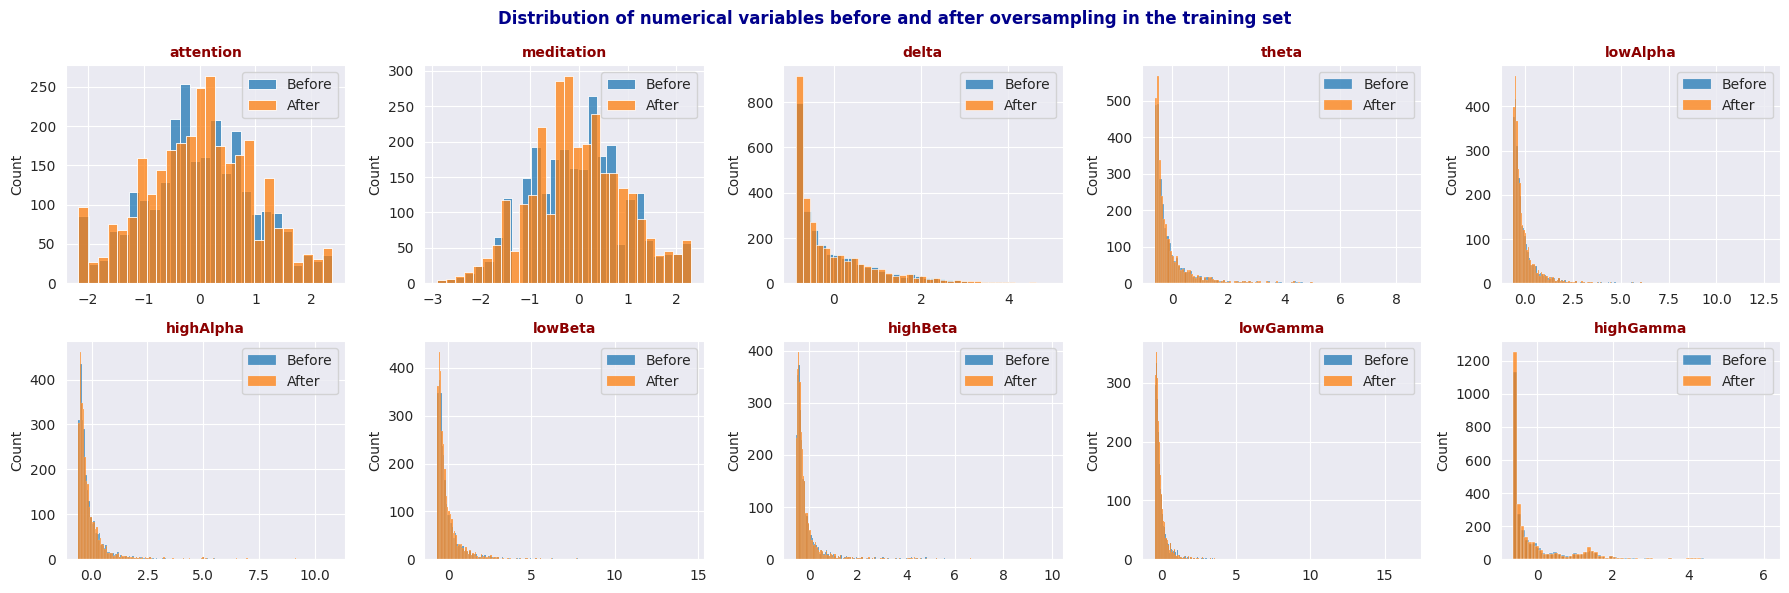

In [20]:
fig,ax = plt.subplots(2,5,figsize = (18,6))
ax = ax.flat

for i, col in enumerate(cols_to_plot):
  sns.histplot(X_train_prep_df[col], ax = ax[i], label = "Before")
  sns.histplot(X_train_df[col], ax = ax[i], label = "After")
  ax[i].set_xlabel('')
  ax[i].set_title(f'{col}', fontsize = 10, fontweight = 'bold', color = 'darkred')
  ax[i].legend()

fig.suptitle('Distribution of numerical variables before and after oversampling in the training set', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()

In [22]:
y_train_smote.value_counts(normalize = True)  #classes are balance now

0    0.5
1    0.5
Name: classification, dtype: float64

In [23]:
# Estimators for the VotingClassifier and StackingClassifier.
e1 = XGBClassifier(objective = 'binary:logistic', random_state = SEED,
                   tree_method = "exact", booster = 'gbtree')
e2 = LGBMClassifier(random_state = SEED, verbose = -1)
e3 = CatBoostClassifier(random_state = SEED, verbose = 0)

voting1 = VotingClassifier(estimators = [('lgbm', e2), ('cb', e3)])

In [24]:
# We define the models to use.
lr = LogisticRegression(random_state = SEED)

rf = RandomForestClassifier(random_state = SEED)

et = ExtraTreesClassifier(bootstrap = True, random_state = SEED)

svc = SVC(random_state = SEED)

knn = KNeighborsClassifier()

hgb = HistGradientBoostingClassifier(random_state = SEED)

xgb = XGBClassifier(objective = 'binary:logistic', tree_method = "exact",
                    random_state = SEED, booster = 'gbtree')

lgbm = LGBMClassifier(random_state = SEED, verbose = -1)

cb = CatBoostClassifier(random_state = SEED, verbose = 0)

voting = VotingClassifier(estimators = [('lgbm', e2), ('cb', e3)])

stacking = StackingClassifier(estimators = [('lgbm', e2), ('cb', e3)],
                              final_estimator = voting1, stack_method='predict')

# We create a dictionary where we store our models with their respective names.
base_models = {'Logistic_Regression':lr,
               'Random_Forest':rf,
               'Extra_Trees':et,
               'SVC':svc,
               'KNN':knn,
               'XGB':xgb,
               'LGBM':lgbm,
               'CatBoost':cb,
               'Voting':voting,
               'Stacking':stacking,
               'HistGrad':hgb}

In [25]:
## Training

# Dictionary where we will store the metrics of each model.
accuracy_train = {}
accuracy_test = {}

confusion_matrix_train = {}
confusion_matrix_test = {}

for model_name, model in base_models.items():
  start = time.time()
  model.fit(X_train_df, y_train_smote)
  end = time.time()
  print(f'* {model_name}: {end-start} seconds')
  y_pred_train = model.predict(X_train_df)
  y_pred_test = model.predict(X_test_df)
  accuracy_train[model_name] = accuracy_score(np.array(y_train_smote), y_pred_train)
  accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)
  confusion_matrix_train[model_name] = confusion_matrix(np.array(y_train_smote), y_pred_train)
  confusion_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)

* Logistic_Regression: 0.034819841384887695 seconds
* Random_Forest: 1.4221017360687256 seconds
* Extra_Trees: 0.8412914276123047 seconds
* SVC: 1.0875132083892822 seconds
* KNN: 0.024163246154785156 seconds
* XGB: 4.547625303268433 seconds
* LGBM: 0.1971735954284668 seconds
* CatBoost: 3.767035722732544 seconds
* Voting: 4.053831338882446 seconds
* Stacking: 35.7190420627594 seconds
* HistGrad: 0.4507286548614502 seconds


In [26]:
df_accuracy_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index').rename(columns = {0:'Train'})
df_accuracy_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index').rename(columns = {0:'Test'})
df_accuracy = pd.merge(df_accuracy_train, df_accuracy_test, left_index = True, right_index = True)
df_accuracy = df_accuracy.sort_values(['Train', 'Test'], ascending = False)
df_accuracy

,Train,Test
Random_Forest,1.000000,0.787690
XGB,1.000000,0.787690
Extra_Trees,1.000000,0.786798
LGBM,0.985274,0.810883
HistGrad,0.983601,0.808207
Voting,0.968206,0.826940
Stacking,0.968206,0.826940
CatBoost,0.948795,0.818020
KNN,0.827644,0.696699
SVC,0.745984,0.705620


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_accuracy, *['Train'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_accuracy, *['Test'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_accuracy, *['Train'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_accuracy, *['Test'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_accuracy, *[[['Train', 'Test']]], **{})
chart

In [28]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'n_estimators': [1,10, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',0.5],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.7758203116415023
Test Accuracy: 0.7885816235504014


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       641
           1       0.79      0.70      0.74       480

    accuracy                           0.79      1121
   macro avg       0.79      0.78      0.78      1121
weighted avg       0.79      0.79      0.79      1121



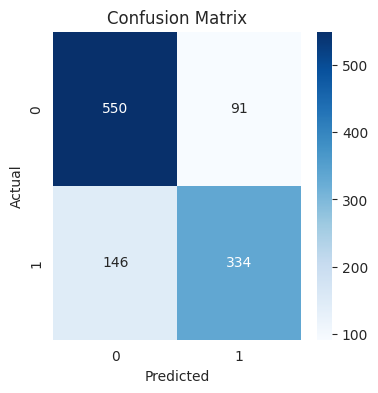

In [32]:
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import pickle
filename = 'Brainwave2_model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))